In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Force Pandas to display all rows and columns
pd.set_option('display.max_rows', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
crimes = pd.read_csv('Crimes_-_2001_to_Present.csv')

In [3]:
arrests = pd.read_csv('Arrests.csv')

In [4]:
census = pd.read_csv('Census_Data_-_Chicago.csv')

In [5]:
publicHealth = pd.read_csv('Chicago_Public_Health_Statistics.csv')

In [6]:
crimes.head()

ID Case Number                    Date                 Block  IUCR   
0  11037294    JA371270  03/18/2015 12:00:00 PM     0000X W WACKER DR  1153  \
1  11646293    JC213749  12/20/2018 03:00:00 PM  023XX N LOCKWOOD AVE  1154   
2  11645836    JC212333  05/01/2016 12:25:00 AM   055XX S ROCKWELL ST  1153   
3  11645959    JC211511  12/20/2018 04:00:00 PM    045XX N ALBANY AVE  2820   
4  11645601    JC212935  06/01/2014 12:01:00 AM   087XX S SANGAMON ST  1153   

         Primary Type                              Description   
0  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300  \
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT $300 AND UNDER   
2  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
3       OTHER OFFENSE                         TELEPHONE THREAT   
4  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  Beat  District  Ward   
0                 BANK   False     False   111       1.0  42.0  \
1            APARTMENT   False     False  2515      25.0  36.0   
2                  NaN   False     False   824       8.0  15.0   
3            RESIDENCE   False     False  1724      17.0  33.0   
4            RESIDENCE   False     False  2222      22.0  21.0   

   Community Area FBI Code  X Coordinate  Y Coordinate  Year   
0            32.0       11           NaN           NaN  2015  \
1            19.0       11           NaN           NaN  2018   
2            63.0       11           NaN           NaN  2016   
3            14.0      08A           NaN           NaN  2018   
4            71.0       11           NaN           NaN  2014   

               Updated On  Latitude  Longitude Location  
0  08/01/2017 03:52:26 PM       NaN        NaN      NaN  
1  04/06/2019 04:04:43 PM       NaN        NaN      NaN  
2  04/06/2019 04:04:43 PM       NaN        NaN      NaN  
3  04/06/2019 04:04:43 PM       NaN        NaN      NaN  
4  04/06/2019 04:04:43 PM       NaN        NaN      NaN

In [7]:
min_year = crimes['Year'].min()
max_year = crimes['Year'].max()
print(f'The year range is from {min_year} to {max_year}')

The year range is from 2001 to 2023


In [8]:
# Filter the DataFrame to retain rows between 2018 and 2023 (inclusive)
crimes_2018_2023 = crimes[(crimes['Year'] >= 2018) & (crimes['Year'] <= 2023)]

In [9]:
crimes_2018_2023.drop(['FBI Code', 'Ward', 'Beat', 'X Coordinate', 'Y Coordinate', 'District', 'IUCR'],axis=1,inplace=True)

In [10]:
# Check for missing values
print(crimes_2018_2023.isnull().sum())

ID                          0
Case Number                 0
Date                        0
Block                       0
Primary Type                0
Description                 0
Location Description     7145
Arrest                      0
Domestic                    0
Community Area              2
Year                        0
Updated On                  0
Latitude                22278
Longitude               22278
Location                22278
dtype: int64


In [11]:
crimes_2018_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1424971 entries, 1 to 7948125
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1424971 non-null  int64  
 1   Case Number           1424971 non-null  object 
 2   Date                  1424971 non-null  object 
 3   Block                 1424971 non-null  object 
 4   Primary Type          1424971 non-null  object 
 5   Description           1424971 non-null  object 
 6   Location Description  1417826 non-null  object 
 7   Arrest                1424971 non-null  bool   
 8   Domestic              1424971 non-null  bool   
 9   Community Area        1424969 non-null  float64
 10  Year                  1424971 non-null  int64  
 11  Updated On            1424971 non-null  object 
 12  Latitude              1402693 non-null  float64
 13  Longitude             1402693 non-null  float64
 14  Location              1402693 non-null 

In [12]:
# Handle missing values in 'Location Description'
crimes_2018_2023['Location Description'].fillna('Unknown', inplace=True)

# Replace missing 'Community Area' with the most frequent value
most_frequent_community_area = crimes_2018_2023['Community Area'].mode()[0]
crimes_2018_2023['Community Area'].fillna(most_frequent_community_area, inplace=True)

In [13]:
# Handle missing values in 'Latitude' and 'Longitude' with mean or median
crimes_2018_2023['Latitude'].fillna(crimes['Latitude'].mean(), inplace=True)
crimes_2018_2023['Longitude'].fillna(crimes['Longitude'].mean(), inplace=True)

In [14]:
print(crimes_2018_2023.isnull().sum())

ID                          0
Case Number                 0
Date                        0
Block                       0
Primary Type                0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
Community Area              0
Year                        0
Updated On                  0
Latitude                    0
Longitude                   0
Location                22278
dtype: int64


In [15]:
mode_location = crimes_2018_2023['Location'].mode()[0]  # Calculate the mode of 'Location' column
crimes_2018_2023['Location'].fillna(mode_location, inplace=True)  # Fill missing values with the mode

In [16]:
print(crimes_2018_2023.isnull().sum())

ID                      0
Case Number             0
Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Community Area          0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [17]:
# # Check rows with NaN values in the 'Location' column
# missing_locations = crimes_2018_2023['Location'].isnull()
# missing_location_rows = crimes_2018_2023[missing_locations]

# # Display rows where 'Location' is NaN
# print(missing_location_rows)

In [18]:
crimes_2018_2023.head()

ID Case Number                    Date                  Block   
1  11646293    JC213749  12/20/2018 03:00:00 PM   023XX N LOCKWOOD AVE  \
3  11645959    JC211511  12/20/2018 04:00:00 PM     045XX N ALBANY AVE   
5  11646166    JC213529  09/01/2018 12:01:00 AM  082XX S INGLESIDE AVE   
6  11645648    JC212959  01/01/2018 08:00:00 AM    024XX N MONITOR AVE   
7  11645557    JC212685  04/01/2018 12:01:00 AM     080XX S VERNON AVE   

         Primary Type                              Description   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT $300 AND UNDER  \
3       OTHER OFFENSE                         TELEPHONE THREAT   
5               THEFT                                OVER $500   
6  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
7  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  Community Area  Year   
1            APARTMENT   False     False            19.0  2018  \
3            RESIDENCE   False     False            14.0  2018   
5            RESIDENCE   False      True            44.0  2018   
6            RESIDENCE   False     False            19.0  2018   
7            RESIDENCE   False     False            44.0  2018   

               Updated On   Latitude  Longitude                       Location  
1  04/06/2019 04:04:43 PM  41.842289  -87.67144  (41.883500187, -87.627876698)  
3  04/06/2019 04:04:43 PM  41.842289  -87.67144  (41.883500187, -87.627876698)  
5  04/06/2019 04:04:43 PM  41.842289  -87.67144  (41.883500187, -87.627876698)  
6  04/06/2019 04:04:43 PM  41.842289  -87.67144  (41.883500187, -87.627876698)  
7  04/06/2019 04:04:43 PM  41.842289  -87.67144  (41.883500187, -87.627876698)

In [19]:
crimes_2018_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1424971 entries, 1 to 7948125
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1424971 non-null  int64  
 1   Case Number           1424971 non-null  object 
 2   Date                  1424971 non-null  object 
 3   Block                 1424971 non-null  object 
 4   Primary Type          1424971 non-null  object 
 5   Description           1424971 non-null  object 
 6   Location Description  1424971 non-null  object 
 7   Arrest                1424971 non-null  bool   
 8   Domestic              1424971 non-null  bool   
 9   Community Area        1424971 non-null  float64
 10  Year                  1424971 non-null  int64  
 11  Updated On            1424971 non-null  object 
 12  Latitude              1424971 non-null  float64
 13  Longitude             1424971 non-null  float64
 14  Location              1424971 non-null 

In [20]:
# creating the categorical values for the relevant columns
crimes_2018_2023['Primary Type']         = pd.Categorical(crimes_2018_2023['Primary Type'])
crimes_2018_2023['Location Description'] = pd.Categorical(crimes_2018_2023['Location Description'])
crimes_2018_2023['Description']          = pd.Categorical(crimes_2018_2023['Description'])

In [21]:
# data = {
#     'Date': ['2023-01-01', '2023-01-02', '2023-01-03'],
#     'Value': [10, 20, 15]
# }
# df = pd.DataFrame(data)

# # Convert 'Date' column to datetime and set as index
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # Check the DataFrame after setting 'Date' as index
# print(df)

In [22]:
#Format the Date column
# convert dates to pandas datetime format
crimes_2018_2023.Date = pd.to_datetime(crimes_2018_2023.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes_2018_2023.index = pd.DatetimeIndex(crimes_2018_2023.Date)

In [23]:
# crimes_2018_2023.drop(columns='Date', inplace=True)
# print(crimes_2018_2023)

In [24]:
# set population total
total_population = 2.679 * 10**6  # 2.679 million

# Create a new 'Population' column and set the same population value for each row
crimes_2018_2023['Population'] = total_population

In [25]:
crimes_2018_2023.head()

ID Case Number                Date   
Date                                                            
2018-12-20 15:00:00  11646293    JC213749 2018-12-20 15:00:00  \
2018-12-20 16:00:00  11645959    JC211511 2018-12-20 16:00:00   
2018-09-01 00:01:00  11646166    JC213529 2018-09-01 00:01:00   
2018-01-01 08:00:00  11645648    JC212959 2018-01-01 08:00:00   
2018-04-01 00:01:00  11645557    JC212685 2018-04-01 00:01:00   

                                     Block        Primary Type   
Date                                                             
2018-12-20 15:00:00   023XX N LOCKWOOD AVE  DECEPTIVE PRACTICE  \
2018-12-20 16:00:00     045XX N ALBANY AVE       OTHER OFFENSE   
2018-09-01 00:01:00  082XX S INGLESIDE AVE               THEFT   
2018-01-01 08:00:00    024XX N MONITOR AVE  DECEPTIVE PRACTICE   
2018-04-01 00:01:00     080XX S VERNON AVE  DECEPTIVE PRACTICE   

                                                 Description   
Date                                                           
2018-12-20 15:00:00  FINANCIAL IDENTITY THEFT $300 AND UNDER  \
2018-12-20 16:00:00                         TELEPHONE THREAT   
2018-09-01 00:01:00                                OVER $500   
2018-01-01 08:00:00      FINANCIAL IDENTITY THEFT OVER $ 300   
2018-04-01 00:01:00      FINANCIAL IDENTITY THEFT OVER $ 300   

                    Location Description  Arrest  Domestic  Community Area   
Date                                                                         
2018-12-20 15:00:00            APARTMENT   False     False            19.0  \
2018-12-20 16:00:00            RESIDENCE   False     False            14.0   
2018-09-01 00:01:00            RESIDENCE   False      True            44.0   
2018-01-01 08:00:00            RESIDENCE   False     False            19.0   
2018-04-01 00:01:00            RESIDENCE   False     False            44.0   

                     Year              Updated On   Latitude  Longitude   
Date                                                                      
2018-12-20 15:00:00  2018  04/06/2019 04:04:43 PM  41.842289  -87.67144  \
2018-12-20 16:00:00  2018  04/06/2019 04:04:43 PM  41.842289  -87.67144   
2018-09-01 00:01:00  2018  04/06/2019 04:04:43 PM  41.842289  -87.67144   
2018-01-01 08:00:00  2018  04/06/2019 04:04:43 PM  41.842289  -87.67144   
2018-04-01 00:01:00  2018  04/06/2019 04:04:43 PM  41.842289  -87.67144   

                                          Location  Population  
Date                                                            
2018-12-20 15:00:00  (41.883500187, -87.627876698)   2679000.0  
2018-12-20 16:00:00  (41.883500187, -87.627876698)   2679000.0  
2018-09-01 00:01:00  (41.883500187, -87.627876698)   2679000.0  
2018-01-01 08:00:00  (41.883500187, -87.627876698)   2679000.0  
2018-04-01 00:01:00  (41.883500187, -87.627876698)   2679000.0

In [26]:
# Get a count of the crimes using 'Primary Type'
crimes_2018_2023cc = crimes_2018_2023['Primary Type'].value_counts().reset_index()
crimes_2018_2023cc.columns = ['Primary Type', 'Count']
crimes_2018_2023cc = crimes_2018_2023cc.sort_values(by='Count', ascending=False)

In [27]:
crimes_2018_2023cc.head()

Primary Type   Count
0               THEFT  315634
1             BATTERY  262178
2     CRIMINAL DAMAGE  158834
3             ASSAULT  120829
4  DECEPTIVE PRACTICE  105723

In [28]:
arrests.head()

CB_NO CASE NUMBER             ARREST DATE   RACE       CHARGE 1 STATUTE   
0  18922700         NaN  06/26/2014 10:51:00 PM  BLACK     725 ILCS 5.0/110-3  \
1  18922086         NaN  06/26/2014 12:07:00 AM  BLACK   625 ILCS 5.0/6-303-A   
2  18908465    HX290868  06/05/2014 11:58:00 AM  BLACK   720 ILCS 570.0/402-C   
3  18914257    HX302763  06/14/2014 04:50:00 AM  BLACK  720 ILCS 5.0/12-3-A-1   
4  18911035         NaN  06/09/2014 08:45:00 AM  BLACK                8-4-030   

                                CHARGE 1 DESCRIPTION CHARGE 1 TYPE   
0                                ISSUANCE OF WARRANT           NaN  \
1                       DRIVING ON SUSPENDED LICENSE             M   
2  PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D)             F   
3                        BATTERY - CAUSE BODILY HARM             M   
4                 DRINKING ALCOHOL ON THE PUBLIC WAY           NaN   

  CHARGE 1 CLASS      CHARGE 2 STATUTE                CHARGE 2 DESCRIPTION   
0              Z                   NaN                                 NaN  \
1              A           9-76-160(A)           DISPLAY ST REG-FRONT/REAR   
2              4  720 ILCS 600.0/3.5-A  PCS - DRUG PARAPHERNALIA - POSSESS   
3              A     520 ILCS 5.0/1.22             RESIST/OBSTRUCT OFFICER   
4              L                   NaN                                 NaN   

  CHARGE 2 TYPE CHARGE 2 CLASS       CHARGE 3 STATUTE   
0           NaN            NaN                    NaN  \
1           NaN              L                    NaN   
2             M              A                    NaN   
3             M              A  720 ILCS 5.0/12-3-A-1   
4           NaN            NaN                    NaN   

          CHARGE 3 DESCRIPTION CHARGE 3 TYPE CHARGE 3 CLASS CHARGE 4 STATUTE   
0                          NaN           NaN            NaN              NaN  \
1                          NaN           NaN            NaN              NaN   
2                          NaN           NaN            NaN              NaN   
3  BATTERY - CAUSE BODILY HARM             M              A              NaN   
4                          NaN           NaN            NaN              NaN   

  CHARGE 4 DESCRIPTION CHARGE 4 TYPE CHARGE 4 CLASS   
0                  NaN           NaN            NaN  \
1                  NaN           NaN            NaN   
2                  NaN           NaN            NaN   
3                  NaN           NaN            NaN   
4                  NaN           NaN            NaN   

                                     CHARGES STATUTE   
0                         725 ILCS 5.0/110-3 |  |  |  \
1            625 ILCS 5.0/6-303-A | 9-76-160(A) |  |   
2   720 ILCS 570.0/402-C | 720 ILCS 600.0/3.5-A |  |   
3  720 ILCS 5.0/12-3-A-1 | 520 ILCS 5.0/1.22 | 72...   
4                                    8-4-030 |  |  |   

                                 CHARGES DESCRIPTION CHARGES TYPE   
0                        ISSUANCE OF WARRANT |  |  |      |  |  |  \
1  DRIVING ON SUSPENDED LICENSE | DISPLAY ST REG-...    M |  |  |   
2  PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...   F | M |  |   
3  BATTERY - CAUSE BODILY HARM | RESIST/OBSTRUCT ...  M | M | M |   
4         DRINKING ALCOHOL ON THE PUBLIC WAY |  |  |      |  |  |   

  CHARGES CLASS  
0     Z |  |  |  
1    A | L |  |  
2    4 | A |  |  
3   A | A | A |  
4     L |  |  |

In [29]:
arrests.isna().sum()

CB_NO                        0
CASE NUMBER             237239
ARREST DATE                  0
RACE                         0
CHARGE 1 STATUTE             0
CHARGE 1 DESCRIPTION         0
CHARGE 1 TYPE           133801
CHARGE 1 CLASS            4711
CHARGE 2 STATUTE        355356
CHARGE 2 DESCRIPTION    355356
CHARGE 2 TYPE           469894
CHARGE 2 CLASS          357557
CHARGE 3 STATUTE        474857
CHARGE 3 DESCRIPTION    474857
CHARGE 3 TYPE           570084
CHARGE 3 CLASS          475495
CHARGE 4 STATUTE        539988
CHARGE 4 DESCRIPTION    539988
CHARGE 4 TYPE           600279
CHARGE 4 CLASS          540191
CHARGES STATUTE              0
CHARGES DESCRIPTION          0
CHARGES TYPE                 0
CHARGES CLASS                0
dtype: int64

In [30]:
arrests.drop(['CB_NO','CHARGE 1 STATUTE','CHARGE 1 DESCRIPTION','CHARGE 1 TYPE','CHARGE 1 CLASS','CHARGE 2 STATUTE',
             'CHARGE 2 DESCRIPTION','CHARGE 2 TYPE','CHARGE 2 CLASS','CHARGE 3 STATUTE','CHARGE 3 DESCRIPTION',
            'CHARGE 3 TYPE','CHARGE 3 CLASS','CHARGE 4 STATUTE','CHARGE 4 DESCRIPTION','CHARGE 4 TYPE','CHARGE 4 CLASS',
            'CHARGES STATUTE','CHARGES DESCRIPTION','CHARGES TYPE','CHARGES CLASS'],axis=1,inplace=True)

In [31]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620953 entries, 0 to 620952
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CASE NUMBER  383714 non-null  object
 1   ARREST DATE  620953 non-null  object
 2   RACE         620953 non-null  object
dtypes: object(3)
memory usage: 14.2+ MB


# Merge Crimes and Arrests

In [32]:
crimes_2018_2023_arrests=pd.merge(crimes_2018_2023,arrests,how='inner',left_on=['Case Number'],right_on=['CASE NUMBER'])
crimes_2018_2023_arrests.drop('CASE NUMBER',axis=1,inplace=True)
crimes_2018_2023_arrests.head()

ID Case Number                Date                 Block   
0  12093529    JD282112 2020-07-01 10:16:00     081XX S COLES AVE  \
1  12126129    JD321064 2020-08-04 20:28:00   081XX S LOOMIS BLVD   
2  12067286    JD251718 2020-06-02 22:00:00   042XX S EMERALD AVE   
3  12163191    JD364357 2020-09-11 22:44:00  008XX N TRUMBULL AVE   
4  12057185    JD239952 2020-05-22 22:29:00     0000X N LOREL AVE   

        Primary Type                    Description Location Description   
0            ASSAULT           AGGRAVATED - HANDGUN               STREET  \
1  WEAPONS VIOLATION  UNLAWFUL POSSESSION - HANDGUN               STREET   
2              THEFT                 $500 AND UNDER               STREET   
3            BATTERY        DOMESTIC BATTERY SIMPLE            RESIDENCE   
4          NARCOTICS       POSSESS - HEROIN (WHITE)               STREET   

   Arrest  Domestic  Community Area  Year              Updated On   Latitude   
0    True     False            46.0  2020  07/08/2020 03:41:45 PM  41.747610  \
1    True     False            71.0  2020  08/11/2020 03:42:53 PM  41.746221   
2    True     False            61.0  2020  06/09/2020 03:43:29 PM  41.817138   
3    True      True            23.0  2020  09/07/2021 03:41:02 PM  41.896471   
4    True     False            25.0  2020  05/29/2020 03:41:25 PM  41.880824   

   Longitude                       Location  Population   
0 -87.549179  (41.747609555, -87.549179329)   2679000.0  \
1 -87.658477  (41.746220584, -87.658477307)   2679000.0   
2 -87.644538  (41.817138145, -87.644537728)   2679000.0   
3 -87.712687  (41.896470682, -87.712687444)   2679000.0   
4 -87.758748  (41.880823946, -87.758747941)   2679000.0   

              ARREST DATE            RACE  
0  07/01/2020 10:46:00 AM           BLACK  
1  08/04/2020 08:32:00 PM           BLACK  
2  06/02/2020 10:24:00 PM           BLACK  
3  09/11/2020 11:00:00 PM  WHITE HISPANIC  
4  05/22/2020 10:40:00 PM           BLACK

In [33]:
crimes_2018_2023_arrests['Day parts'] = pd.cut(pd.to_datetime(crimes_2018_2023_arrests.Date).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['night', 'morning', 'afternoon', 'evening'],
       right=False,
       include_lowest=True)

In [34]:
crimes_2018_2023_arrests.head(2)

ID Case Number                Date                Block   
0  12093529    JD282112 2020-07-01 10:16:00    081XX S COLES AVE  \
1  12126129    JD321064 2020-08-04 20:28:00  081XX S LOOMIS BLVD   

        Primary Type                    Description Location Description   
0            ASSAULT           AGGRAVATED - HANDGUN               STREET  \
1  WEAPONS VIOLATION  UNLAWFUL POSSESSION - HANDGUN               STREET   

   Arrest  Domestic  Community Area  Year              Updated On   Latitude   
0    True     False            46.0  2020  07/08/2020 03:41:45 PM  41.747610  \
1    True     False            71.0  2020  08/11/2020 03:42:53 PM  41.746221   

   Longitude                       Location  Population   
0 -87.549179  (41.747609555, -87.549179329)   2679000.0  \
1 -87.658477  (41.746220584, -87.658477307)   2679000.0   

              ARREST DATE   RACE Day parts  
0  07/01/2020 10:46:00 AM  BLACK   morning  
1  08/04/2020 08:32:00 PM  BLACK   evening

In [35]:
type_count=crimes_2018_2023_arrests.groupby(['Community Area','Day parts','Primary Type']).agg({'Primary Type':'count'}) 
type_count.rename({'Primary Type':"Primary type counts",'Arrest':'Arrest counts','RACE':'RACE Counts'},axis=1,inplace=True)
type_count = type_count.reset_index()
type_count

Community Area  Day parts                       Primary Type   
0                 1.0      night                              ARSON  \
1                 1.0      night                            ASSAULT   
2                 1.0      night                            BATTERY   
3                 1.0      night                           BURGLARY   
4                 1.0      night  CONCEALED CARRY LICENSE VIOLATION   
5                 1.0      night                CRIM SEXUAL ASSAULT   
6                 1.0      night                    CRIMINAL DAMAGE   
7                 1.0      night            CRIMINAL SEXUAL ASSAULT   
8                 1.0      night                  CRIMINAL TRESPASS   
9                 1.0      night                 DECEPTIVE PRACTICE   
10                1.0      night                           GAMBLING   
11                1.0      night                           HOMICIDE   
12                1.0      night                  HUMAN TRAFFICKING   
13                1.0      night   INTERFERENCE WITH PUBLIC OFFICER   
14                1.0      night                       INTIMIDATION   
15                1.0      night                         KIDNAPPING   
16                1.0      night               LIQUOR LAW VIOLATION   
17                1.0      night                MOTOR VEHICLE THEFT   
18                1.0      night                          NARCOTICS   
19                1.0      night                       NON-CRIMINAL   
20                1.0      night   NON-CRIMINAL (SUBJECT SPECIFIED)   
21                1.0      night                          OBSCENITY   
22                1.0      night         OFFENSE INVOLVING CHILDREN   
23                1.0      night           OTHER NARCOTIC VIOLATION   
24                1.0      night                      OTHER OFFENSE   
25                1.0      night                       PROSTITUTION   
26                1.0      night                   PUBLIC INDECENCY   
27                1.0      night             PUBLIC PEACE VIOLATION   
28                1.0      night                          RITUALISM   
29                1.0      night                            ROBBERY   
30                1.0      night                        SEX OFFENSE   
31                1.0      night                           STALKING   
32                1.0      night                              THEFT   
33                1.0      night                  WEAPONS VIOLATION   
34                1.0    morning                              ARSON   
35                1.0    morning                            ASSAULT   
36                1.0    morning                            BATTERY   
37                1.0    morning                           BURGLARY   
38                1.0    morning  CONCEALED CARRY LICENSE VIOLATION   
39                1.0    morning                CRIM SEXUAL ASSAULT   
40                1.0    morning                    CRIMINAL DAMAGE   
41                1.0    morning            CRIMINAL SEXUAL ASSAULT   
42                1.0    morning                  CRIMINAL TRESPASS   
43                1.0    morning                 DECEPTIVE PRACTICE   
44                1.0    morning                           GAMBLING   
45                1.0    morning                           HOMICIDE   
46                1.0    morning                  HUMAN TRAFFICKING   
47                1.0    morning   INTERFERENCE WITH PUBLIC OFFICER   
48                1.0    morning                       INTIMIDATION   
49                1.0    morning                         KIDNAPPING   
50                1.0    morning               LIQUOR LAW VIOLATION   
51                1.0    morning                MOTOR VEHICLE THEFT   
52                1.0    morning                          NARCOTICS   
53                1.0    morning                       NON-CRIMINAL   
54                1.0    morning   NON-CRIMINAL (SUBJECT SPECIFIED)   
55                1.0    mornin

In [36]:
type_count['Community Area'].nunique()

77

In [37]:
census.head()

Community Area Number COMMUNITY AREA NAME  PERCENT OF HOUSING CROWDED   
0                    1.0         Rogers Park                         7.7  \
1                    2.0          West Ridge                         7.8   
2                    3.0              Uptown                         3.8   
3                    4.0      Lincoln Square                         3.4   
4                    5.0        North Center                         0.3   

   PERCENT HOUSEHOLDS BELOW POVERTY  PERCENT AGED 16+ UNEMPLOYED   
0                              23.6                          8.7  \
1                              17.2                          8.8   
2                              24.0                          8.9   
3                              10.9                          8.2   
4                               7.5                          5.2   

   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA   
0                                          18.2  \
1                                          20.8   
2                                          11.8   
3                                          13.4   
4                                           4.5   

   PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   HARDSHIP INDEX  
0                              27.5               23939            39.0  
1                              38.5               23040            46.0  
2                              22.2               35787            20.0  
3                              25.5               37524            17.0  
4                              26.2               57123             6.0

In [38]:
census['Community Area Number'].nunique()

77

In [39]:
census.isna().sum()

Community Area Number                           1
COMMUNITY AREA NAME                             0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER CAPITA INCOME                               0
HARDSHIP INDEX                                  1
dtype: int64

In [40]:
census.drop(['PERCENT OF HOUSING CROWDED'], axis=1, inplace=True)

In [41]:
census.head()

Community Area Number COMMUNITY AREA NAME   
0                    1.0         Rogers Park  \
1                    2.0          West Ridge   
2                    3.0              Uptown   
3                    4.0      Lincoln Square   
4                    5.0        North Center   

   PERCENT HOUSEHOLDS BELOW POVERTY  PERCENT AGED 16+ UNEMPLOYED   
0                              23.6                          8.7  \
1                              17.2                          8.8   
2                              24.0                          8.9   
3                              10.9                          8.2   
4                               7.5                          5.2   

   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA   
0                                          18.2  \
1                                          20.8   
2                                          11.8   
3                                          13.4   
4                                           4.5   

   PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   HARDSHIP INDEX  
0                              27.5               23939            39.0  
1                              38.5               23040            46.0  
2                              22.2               35787            20.0  
3                              25.5               37524            17.0  
4                              26.2               57123             6.0

# Merge Crimes_Arrests and Census

In [42]:
crimes_2018_2023_arrests_census=pd.merge(crimes_2018_2023_arrests,census,how='inner',left_on=['Community Area'],right_on=['Community Area Number'])

In [43]:
crimes_2018_2023_arrests_census.head()

ID Case Number                Date                Block   
0  12093529    JD282112 2020-07-01 10:16:00    081XX S COLES AVE  \
1  12155809    JD355775 2020-09-04 00:57:00   087XX S BURLEY AVE   
2  11999480    JD174203 2020-03-04 18:29:00    084XX S BAKER AVE   
3  12004744    JD180541 2020-03-09 11:27:00  081XX S CRANDON AVE   
4  12023524    JD201662 2020-04-04 01:39:00   083XX S COLFAX AVE   

                       Primary Type                    Description   
0                           ASSAULT           AGGRAVATED - HANDGUN  \
1                     OTHER OFFENSE   FALSE / STOLEN / ALTERED TRP   
2  INTERFERENCE WITH PUBLIC OFFICER     OBSTRUCTING IDENTIFICATION   
3                     OTHER OFFENSE               TELEPHONE THREAT   
4                 WEAPONS VIOLATION  UNLAWFUL POSSESSION - HANDGUN   

  Location Description  Arrest  Domestic  Community Area  Year   
0               STREET    True     False            46.0  2020  \
1               STREET    True     False            46.0  2020   
2               STREET    True     False            46.0  2020   
3            RESIDENCE    True     False            46.0  2020   
4               STREET    True     False            46.0  2020   

               Updated On   Latitude  Longitude   
0  07/08/2020 03:41:45 PM  41.747610 -87.549179  \
1  09/11/2020 03:41:07 PM  41.736675 -87.545821   
2  03/11/2020 03:40:48 PM  41.741775 -87.547539   
3  03/17/2020 03:40:57 PM  41.747403 -87.568604   
4  04/11/2020 03:42:29 PM  41.743701 -87.561246   

                        Location  Population             ARREST DATE   RACE   
0  (41.747609555, -87.549179329)   2679000.0  07/01/2020 10:46:00 AM  BLACK  \
1  (41.736675238, -87.545820662)   2679000.0  09/04/2020 01:14:00 AM  BLACK   
2  (41.741774942, -87.547539146)   2679000.0  03/04/2020 06:45:00 PM  BLACK   
3  (41.747402933, -87.568603735)   2679000.0  03/10/2020 05:05:00 PM  BLACK   
4  (41.743701059, -87.561245782)   2679000.0  04/04/2020 02:20:00 AM  BLACK   

  Day parts  Community Area Number COMMUNITY AREA NAME   
0   morning                   46.0       South Chicago  \
1     night                   46.0       South Chicago   
2   evening                   46.0       South Chicago   
3   morning                   46.0       South Chicago   
4     night                   46.0       South Chicago   

   PERCENT HOUSEHOLDS BELOW POVERTY  PERCENT AGED 16+ UNEMPLOYED   
0                              29.8                         19.7  \
1                              29.8                         19.7   
2                              29.8                         19.7   
3                              29.8                         19.7   
4                              29.8                         19.7   

   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA   
0                                          26.6  \
1                                          26.6   
2                                          26.6   
3                                          26.6   
4                                          26.6   

   PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   HARDSHIP INDEX  
0                              41.1               16579            75.0  
1                              41.1               16579            75.0  
2                              41.1               16579            75.0  
3                              41.1               16579            75.0  
4                              41.1               16579            75.0

In [44]:
crimes_2018_2023_arrests_census.drop('Community Area Number',axis=1,inplace=True)

In [45]:
crimes_2018_2023_arrests_census.head()

ID Case Number                Date                Block   
0  12093529    JD282112 2020-07-01 10:16:00    081XX S COLES AVE  \
1  12155809    JD355775 2020-09-04 00:57:00   087XX S BURLEY AVE   
2  11999480    JD174203 2020-03-04 18:29:00    084XX S BAKER AVE   
3  12004744    JD180541 2020-03-09 11:27:00  081XX S CRANDON AVE   
4  12023524    JD201662 2020-04-04 01:39:00   083XX S COLFAX AVE   

                       Primary Type                    Description   
0                           ASSAULT           AGGRAVATED - HANDGUN  \
1                     OTHER OFFENSE   FALSE / STOLEN / ALTERED TRP   
2  INTERFERENCE WITH PUBLIC OFFICER     OBSTRUCTING IDENTIFICATION   
3                     OTHER OFFENSE               TELEPHONE THREAT   
4                 WEAPONS VIOLATION  UNLAWFUL POSSESSION - HANDGUN   

  Location Description  Arrest  Domestic  Community Area  Year   
0               STREET    True     False            46.0  2020  \
1               STREET    True     False            46.0  2020   
2               STREET    True     False            46.0  2020   
3            RESIDENCE    True     False            46.0  2020   
4               STREET    True     False            46.0  2020   

               Updated On   Latitude  Longitude   
0  07/08/2020 03:41:45 PM  41.747610 -87.549179  \
1  09/11/2020 03:41:07 PM  41.736675 -87.545821   
2  03/11/2020 03:40:48 PM  41.741775 -87.547539   
3  03/17/2020 03:40:57 PM  41.747403 -87.568604   
4  04/11/2020 03:42:29 PM  41.743701 -87.561246   

                        Location  Population             ARREST DATE   RACE   
0  (41.747609555, -87.549179329)   2679000.0  07/01/2020 10:46:00 AM  BLACK  \
1  (41.736675238, -87.545820662)   2679000.0  09/04/2020 01:14:00 AM  BLACK   
2  (41.741774942, -87.547539146)   2679000.0  03/04/2020 06:45:00 PM  BLACK   
3  (41.747402933, -87.568603735)   2679000.0  03/10/2020 05:05:00 PM  BLACK   
4  (41.743701059, -87.561245782)   2679000.0  04/04/2020 02:20:00 AM  BLACK   

  Day parts COMMUNITY AREA NAME  PERCENT HOUSEHOLDS BELOW POVERTY   
0   morning       South Chicago                              29.8  \
1     night       South Chicago                              29.8   
2   evening       South Chicago                              29.8   
3   morning       South Chicago                              29.8   
4     night       South Chicago                              29.8   

   PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA   
0                         19.7                                          26.6  \
1                         19.7                                          26.6   
2                         19.7                                          26.6   
3                         19.7                                          26.6   
4                         19.7                                          26.6   

   PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   HARDSHIP INDEX  
0                              41.1               16579            75.0  
1                              41.1               16579            75.0  
2                              41.1               16579            75.0  
3                              41.1               16579            75.0  
4                              41.1               16579            75.0

In [46]:
crimes_2018_2023_arrests_census.shape

(202396, 26)

In [47]:
crimes_2018_2023_arrests_census.describe()

ID                           Date  Community Area   
count  2.023960e+05                         202396   202396.000000  \
mean   1.201615e+07  2020-07-03 14:56:55.829012992       37.588549   
min    2.376500e+04            2018-01-01 00:00:00        1.000000   
25%    1.157557e+07            2019-01-31 00:11:00       24.000000   
50%    1.195984e+07            2020-01-27 08:23:00       31.000000   
75%    1.257083e+07            2021-12-20 11:10:45       53.000000   
max    1.329458e+07            2023-11-25 00:00:00       77.000000   
std    1.069504e+06                            NaN       20.653514   

                Year       Latitude      Longitude  Population   
count  202396.000000  202396.000000  202396.000000    202396.0  \
mean     2020.020252      41.838901     -87.672679   2679000.0   
min      2018.000000      36.619446     -91.686566   2679000.0   
25%      2019.000000      41.766889     -87.717828   2679000.0   
50%      2020.000000      41.860404     -87.666723   2679000.0   
75%      2021.000000      41.895490     -87.627877   2679000.0   
max      2023.000000      42.022549     -87.524529   2679000.0   
std         1.704175       0.084660       0.060549         0.0   

       PERCENT HOUSEHOLDS BELOW POVERTY  PERCENT AGED 16+ UNEMPLOYED   
count                     202396.000000                202396.000000  \
mean                          26.663915                    17.861855   
min                            3.300000                     4.700000   
25%                           17.200000                    10.700000   
50%                           27.900000                    19.600000   
75%                           33.900000                    23.000000   
max                           56.500000                    35.900000   
std                           10.478593                     7.678561   

       PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA   
count                                 202396.000000  \
mean                                      21.319138   
min                                        2.500000   
25%                                       14.000000   
50%                                       20.800000   
75%                                       27.600000   
max                                       54.800000   
std                                       11.474289   

       PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   HARDSHIP INDEX  
count                     202396.000000       202396.000000   202396.000000  
mean                          35.580802        24782.340526       58.037555  
min                           13.500000         8201.000000        1.000000  
25%                           32.000000        13231.000000       35.000000  
50%                           38.000000        16579.000000       66.000000  
75%                           41.200000        24454.000000       85.000000  
max                           51.500000        88669.000000       98.000000  
std                            8.285707        19408.117484       30.188819

In [48]:
publicHealth.head()

Community Area Community Area Name  Birth Rate  General Fertility Rate   
0               1         Rogers Park        16.4                    62.0  \
1               2          West Ridge        17.3                    83.3   
2               3              Uptown        13.1                    50.5   
3               4      Lincoln Square        17.1                    61.0   
4               5        North Center        22.4                    76.2   

   Low Birth Weight  Prenatal Care Beginning in First Trimester   
0              11.0                                        73.0  \
1               8.1                                        71.1   
2               8.3                                        77.7   
3               8.1                                        80.5   
4               9.1                                        80.4   

   Preterm Births  Teen Birth Rate  Assault (Homicide)   
0            11.2             40.8                 7.7  \
1             8.3             29.9                 5.8   
2            10.3             35.1                 5.4   
3             9.7             38.4                 5.0   
4             9.8              8.4                 1.0   

   Breast cancer in females  Cancer (All Sites)  Colorectal Cancer   
0                      23.3               176.9               25.3  \
1                      20.2               155.9               17.3   
2                      21.3               183.3               20.5   
3                      21.7               153.2                8.6   
4                      16.6               152.1               26.1   

   Diabetes-related  Firearm-related  Infant Mortality Rate  Lung Cancer   
0              77.1              5.2                    6.4         36.7  \
1              60.5              3.7                    5.1         36.0   
2              80.0              4.6                    6.5         50.5   
3              55.4              6.1                    3.8         43.1   
4              49.8              1.0                    2.7         42.4   

   Prostate Cancer in Males  Stroke (Cerebrovascular Disease)   
0                      21.7                              33.7  \
1                      14.2                              34.7   
2                      25.2                              41.7   
3                      27.6                              36.9   
4                      15.1                              41.6   

   Childhood Blood Lead Level Screening  Childhood Lead Poisoning   
0                                 364.7                       0.5  \
1                                 331.4                       1.0   
2                                 353.7                       0.5   
3                                 273.3                       0.4   
4                                 178.1                       0.9   

   Gonorrhea in Females Gonorrhea in Males  Tuberculosis  Below Poverty Level   
0                 322.5              423.3          11.4                 22.7  \
1                 141.0              205.7           8.9                 15.1   
2                 170.8              468.7          13.6                 22.7   
3                  98.8              195.5           8.5                  9.5   
4                  85.4              188.6           1.9                  7.1   

   Crowded Housing  Dependency  No High School Diploma  Per Capita Income   
0              7.9        28.8                    18.1              23714  \
1              7.0        38.3                    19.6              21375   
2              4.6        22.2                    13.6              32355   
3              3.1        25.6                    12.5              35503   
4              0.2        25.5                     5.4              51615   

   Unemployment  
0           7.5  
1           7.9  
2           7.7  
3           6.8  
4           4.5

In [49]:
publicHealth.drop(['Community Area Name','General Fertility Rate','Low Birth Weight','Prenatal Care Beginning in First Trimester','Preterm Births','Breast cancer in females','Cancer (All Sites)','Colorectal Cancer','Diabetes-related','Lung Cancer','Prostate Cancer in Males','Stroke (Cerebrovascular Disease)','Childhood Blood Lead Level Screening','Childhood Lead Poisoning','Gonorrhea in Females','Gonorrhea in Males','Tuberculosis','Tuberculosis'], axis=1, inplace=True)

In [50]:
publicHealth.head()

Community Area  Birth Rate  Teen Birth Rate  Assault (Homicide)   
0               1        16.4             40.8                 7.7  \
1               2        17.3             29.9                 5.8   
2               3        13.1             35.1                 5.4   
3               4        17.1             38.4                 5.0   
4               5        22.4              8.4                 1.0   

   Firearm-related  Infant Mortality Rate  Below Poverty Level   
0              5.2                    6.4                 22.7  \
1              3.7                    5.1                 15.1   
2              4.6                    6.5                 22.7   
3              6.1                    3.8                  9.5   
4              1.0                    2.7                  7.1   

   Crowded Housing  Dependency  No High School Diploma  Per Capita Income   
0              7.9        28.8                    18.1              23714  \
1              7.0        38.3                    19.6              21375   
2              4.6        22.2                    13.6              32355   
3              3.1        25.6                    12.5              35503   
4              0.2        25.5                     5.4              51615   

   Unemployment  
0           7.5  
1           7.9  
2           7.7  
3           6.8  
4           4.5

In [51]:
publicHealth.shape

(77, 12)

In [52]:
publicHealth.isna().sum()

Community Area            0
Birth Rate                0
Teen Birth Rate           0
Assault (Homicide)        0
Firearm-related           0
Infant Mortality Rate     0
Below Poverty Level       0
Crowded Housing           0
Dependency                0
No High School Diploma    0
Per Capita Income         0
Unemployment              0
dtype: int64

In [53]:
publicHealth['Community Area'].nunique()

77

In [54]:
publicHealth.describe()

Community Area  Birth Rate  Teen Birth Rate  Assault (Homicide)   
count       77.000000   77.000000        77.000000           77.000000  \
mean        39.000000   15.698701        50.064935           18.068831   
std         22.371857    3.528735        28.097817           16.561077   
min          1.000000    9.400000         1.300000            0.000000   
25%         20.000000   12.900000        33.700000            4.900000   
50%         39.000000   15.700000        49.200000           10.800000   
75%         58.000000   18.500000        67.900000           32.200000   
max         77.000000   22.400000       116.900000           70.300000   

       Firearm-related  Infant Mortality Rate  Below Poverty Level   
count        77.000000              77.000000            77.000000  \
mean         16.731169               8.574026            20.292208   
std          14.462222               4.408765            11.496988   
min           1.000000               1.500000             3.100000   
25%           5.500000               5.100000            12.000000   
50%          10.600000               8.100000            18.200000   
75%          25.800000              11.400000            26.100000   
max          70.300000              22.600000            61.400000   

       Crowded Housing  Dependency  No High School Diploma  Per Capita Income   
count        77.000000   77.000000               77.000000          77.000000  \
mean          4.912987   35.829870               21.596104       25106.740260   
std           3.657341    7.269802               12.354995       14952.672297   
min           0.200000   15.500000                2.900000        8535.000000   
25%           2.000000   32.300000               13.400000       15467.000000   
50%           4.200000   38.300000               18.500000       20489.000000   
75%           6.800000   40.900000               29.400000       29026.000000   
max          17.600000   50.200000               58.700000       87163.000000   

       Unemployment  
count     77.000000  
mean      13.303896  
std        7.031965  
min        4.200000  
25%        7.800000  
50%       11.500000  
75%       17.400000  
max       40.000000

In [55]:
publicHealth.dropna(inplace=True)

In [56]:
publicHealth.isna().sum()

Community Area            0
Birth Rate                0
Teen Birth Rate           0
Assault (Homicide)        0
Firearm-related           0
Infant Mortality Rate     0
Below Poverty Level       0
Crowded Housing           0
Dependency                0
No High School Diploma    0
Per Capita Income         0
Unemployment              0
dtype: int64

# Merge Crimes_Arrests_Census and Public Health

In [57]:
crimes_2018_2023_arrests_census_ph = pd.merge(crimes_2018_2023_arrests_census,publicHealth,how='inner',left_on=['Community Area'],right_on=['Community Area'])

In [58]:
# Grouping by 'Primary Type' and 'Area', then counting the occurrences
crime_counts = crimes_2018_2023_arrests_census_ph.groupby(['Primary Type', 'Community Area']).size().reset_index(name='Number of Crimes')

# Merging the counts back to the original dataset based on 'Primary Type' and 'Area'
crimes_2018_2023_arrests_census_ph = pd.merge(crimes_2018_2023_arrests_census_ph, crime_counts, on=['Primary Type', 'Community Area'], how='left')

In [59]:
crimes_2018_2023_arrests_census_ph.head()

ID Case Number                Date                Block   
0  12093529    JD282112 2020-07-01 10:16:00    081XX S COLES AVE  \
1  12155809    JD355775 2020-09-04 00:57:00   087XX S BURLEY AVE   
2  11999480    JD174203 2020-03-04 18:29:00    084XX S BAKER AVE   
3  12004744    JD180541 2020-03-09 11:27:00  081XX S CRANDON AVE   
4  12023524    JD201662 2020-04-04 01:39:00   083XX S COLFAX AVE   

                       Primary Type                    Description   
0                           ASSAULT           AGGRAVATED - HANDGUN  \
1                     OTHER OFFENSE   FALSE / STOLEN / ALTERED TRP   
2  INTERFERENCE WITH PUBLIC OFFICER     OBSTRUCTING IDENTIFICATION   
3                     OTHER OFFENSE               TELEPHONE THREAT   
4                 WEAPONS VIOLATION  UNLAWFUL POSSESSION - HANDGUN   

  Location Description  Arrest  Domestic  Community Area  Year   
0               STREET    True     False            46.0  2020  \
1               STREET    True     False            46.0  2020   
2               STREET    True     False            46.0  2020   
3            RESIDENCE    True     False            46.0  2020   
4               STREET    True     False            46.0  2020   

               Updated On   Latitude  Longitude   
0  07/08/2020 03:41:45 PM  41.747610 -87.549179  \
1  09/11/2020 03:41:07 PM  41.736675 -87.545821   
2  03/11/2020 03:40:48 PM  41.741775 -87.547539   
3  03/17/2020 03:40:57 PM  41.747403 -87.568604   
4  04/11/2020 03:42:29 PM  41.743701 -87.561246   

                        Location  Population             ARREST DATE   RACE   
0  (41.747609555, -87.549179329)   2679000.0  07/01/2020 10:46:00 AM  BLACK  \
1  (41.736675238, -87.545820662)   2679000.0  09/04/2020 01:14:00 AM  BLACK   
2  (41.741774942, -87.547539146)   2679000.0  03/04/2020 06:45:00 PM  BLACK   
3  (41.747402933, -87.568603735)   2679000.0  03/10/2020 05:05:00 PM  BLACK   
4  (41.743701059, -87.561245782)   2679000.0  04/04/2020 02:20:00 AM  BLACK   

  Day parts COMMUNITY AREA NAME  PERCENT HOUSEHOLDS BELOW POVERTY   
0   morning       South Chicago                              29.8  \
1     night       South Chicago                              29.8   
2   evening       South Chicago                              29.8   
3   morning       South Chicago                              29.8   
4     night       South Chicago                              29.8   

   PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA   
0                         19.7                                          26.6  \
1                         19.7                                          26.6   
2                         19.7                                          26.6   
3                         19.7                                          26.6   
4                         19.7                                          26.6   

   PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   HARDSHIP INDEX   
0                              41.1               16579            75.0  \
1                              41.1               16579            75.0   
2                              41.1               16579            75.0   
3                              41.1               16579            75.0   
4                              41.1               16579            75.0   

   Birth Rate  Teen Birth Rate  Assault (Homicide)  Firearm-related   
0        18.1             76.8                36.9             33.7  \
1        18.1             76.8                36.9             33.7   
2        18.1             76.8                36.9             33.7   
3        18.1             76.8                36.9             33.7   
4        18.1             76.8                36.9             33.7   

   Infant Mortality Rate  Below Poverty Level  Crowded Housing  Dependency   
0                   17.7                 28.0              5.9        43.1  \
1                   17.7                 28.0              5.9        

In [60]:
crimes_2018_2023_arrests_census_ph.isna().sum()

ID                                              0
Case Number                                     0
Date                                            0
Block                                           0
Primary Type                                    0
Description                                     0
Location Description                            0
Arrest                                          0
Domestic                                        0
Community Area                                  0
Year                                            0
Updated On                                      0
Latitude                                        0
Longitude                                       0
Location                                        0
Population                                      0
ARREST DATE                                     0
RACE                                            0
Day parts                                       0
COMMUNITY AREA NAME                             0


In [61]:
# Drop the 'PER CAPITA INCOME' column if it's redundant
crimes_2018_2023_arrests_census_ph.drop(columns='PER CAPITA INCOME ', inplace=True)

In [62]:
crimes_2018_2023_arrests_census_ph.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Community Area', 'Year',
       'Updated On', 'Latitude', 'Longitude', 'Location', 'Population',
       'ARREST DATE', 'RACE', 'Day parts', 'COMMUNITY AREA NAME',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'HARDSHIP INDEX', 'Birth Rate',
       'Teen Birth Rate', 'Assault (Homicide)', 'Firearm-related',
       'Infant Mortality Rate', 'Below Poverty Level', 'Crowded Housing',
       'Dependency', 'No High School Diploma', 'Per Capita Income',
       'Unemployment', 'Number of Crimes'],
      dtype='object')

In [63]:
columns_with_nan = crimes_2018_2023_arrests_census_ph.columns[crimes_2018_2023_arrests_census_ph.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)
# crimes_2018_2023_arrests_census_ph.isna()

Columns with NaN values: []


In [64]:
# Save merged file to csv
crimes_2018_2023_arrests_census_ph.to_csv('Cleaned_Chicago_Data.csv', index=False)

# Visualization

In [65]:
df = pd.read_csv('Cleaned_Chicago_Data.csv')

In [66]:
df.head()

ID Case Number                 Date                Block   
0  12093529    JD282112  2020-07-01 10:16:00    081XX S COLES AVE  \
1  12155809    JD355775  2020-09-04 00:57:00   087XX S BURLEY AVE   
2  11999480    JD174203  2020-03-04 18:29:00    084XX S BAKER AVE   
3  12004744    JD180541  2020-03-09 11:27:00  081XX S CRANDON AVE   
4  12023524    JD201662  2020-04-04 01:39:00   083XX S COLFAX AVE   

                       Primary Type                    Description   
0                           ASSAULT           AGGRAVATED - HANDGUN  \
1                     OTHER OFFENSE   FALSE / STOLEN / ALTERED TRP   
2  INTERFERENCE WITH PUBLIC OFFICER     OBSTRUCTING IDENTIFICATION   
3                     OTHER OFFENSE               TELEPHONE THREAT   
4                 WEAPONS VIOLATION  UNLAWFUL POSSESSION - HANDGUN   

  Location Description  Arrest  Domestic  Community Area  Year   
0               STREET    True     False            46.0  2020  \
1               STREET    True     False            46.0  2020   
2               STREET    True     False            46.0  2020   
3            RESIDENCE    True     False            46.0  2020   
4               STREET    True     False            46.0  2020   

               Updated On   Latitude  Longitude   
0  07/08/2020 03:41:45 PM  41.747610 -87.549179  \
1  09/11/2020 03:41:07 PM  41.736675 -87.545821   
2  03/11/2020 03:40:48 PM  41.741775 -87.547539   
3  03/17/2020 03:40:57 PM  41.747403 -87.568604   
4  04/11/2020 03:42:29 PM  41.743701 -87.561246   

                        Location  Population             ARREST DATE   RACE   
0  (41.747609555, -87.549179329)   2679000.0  07/01/2020 10:46:00 AM  BLACK  \
1  (41.736675238, -87.545820662)   2679000.0  09/04/2020 01:14:00 AM  BLACK   
2  (41.741774942, -87.547539146)   2679000.0  03/04/2020 06:45:00 PM  BLACK   
3  (41.747402933, -87.568603735)   2679000.0  03/10/2020 05:05:00 PM  BLACK   
4  (41.743701059, -87.561245782)   2679000.0  04/04/2020 02:20:00 AM  BLACK   

  Day parts COMMUNITY AREA NAME  PERCENT HOUSEHOLDS BELOW POVERTY   
0   morning       South Chicago                              29.8  \
1     night       South Chicago                              29.8   
2   evening       South Chicago                              29.8   
3   morning       South Chicago                              29.8   
4     night       South Chicago                              29.8   

   PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA   
0                         19.7                                          26.6  \
1                         19.7                                          26.6   
2                         19.7                                          26.6   
3                         19.7                                          26.6   
4                         19.7                                          26.6   

   PERCENT AGED UNDER 18 OR OVER 64  HARDSHIP INDEX  Birth Rate   
0                              41.1            75.0        18.1  \
1                              41.1            75.0        18.1   
2                              41.1            75.0        18.1   
3                              41.1            75.0        18.1   
4                              41.1            75.0        18.1   

   Teen Birth Rate  Assault (Homicide)  Firearm-related   
0             76.8                36.9             33.7  \
1             76.8                36.9             33.7   
2             76.8                36.9             33.7   
3             76.8                36.9             33.7   
4             76.8                36.9             33.7   

   Infant Mortality Rate  Below Poverty Level  Crowded Housing  Dependency   
0                   17.7                 28.0              5.9        43.1  \
1                   17.7                 28.0              5.9        43.1   
2                   17.7                 28.0              5.9        43.1   
3                   17.7    

In [67]:
df['Primary Type'].nunique()

32

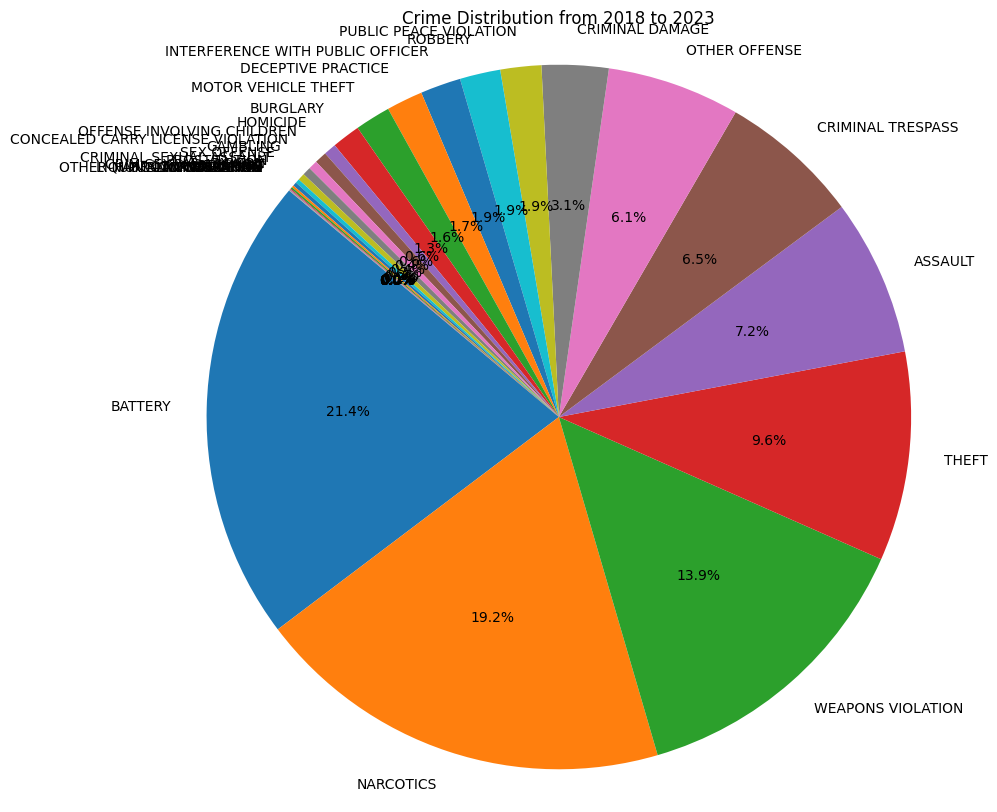

In [68]:
# Group the filtered data by 'Primary Type' and count occurrences
crime_counts = df['Primary Type'].value_counts()
# Plotting a pie chart for crime distribution
plt.figure(figsize=(10, 10))
crime_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Crime Distribution from 2018 to 2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.ylabel('')  # Remove the label for y-axis
plt.show()

In [69]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [70]:
# Set 'Date' column as the index
df.set_index('Date', inplace=True)

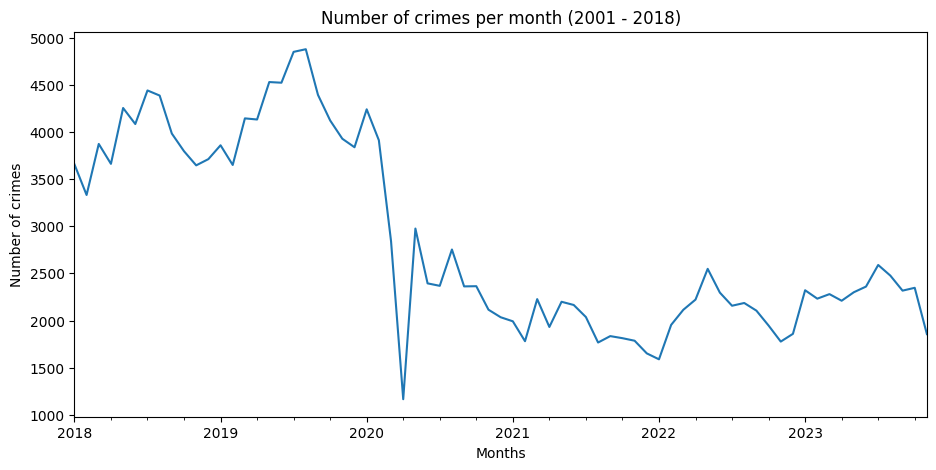

In [71]:
#  Plot the crimes in monthly fashion
plt.figure(figsize=(11,5))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2001 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

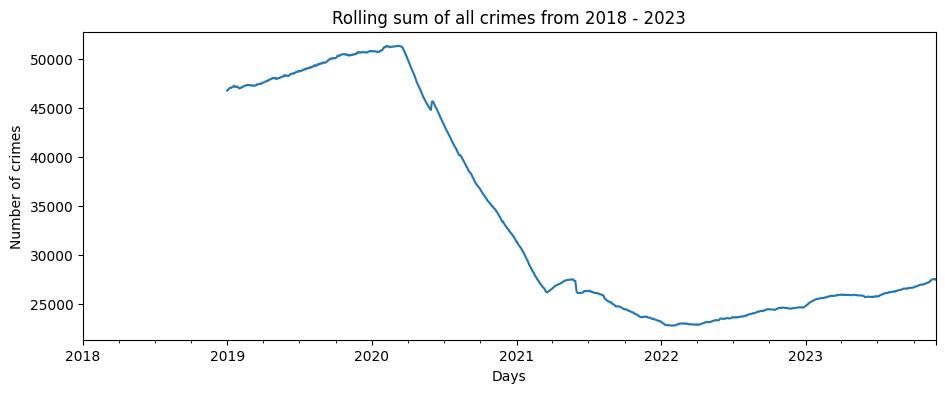

In [72]:
plt.figure(figsize=(11,4))
df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2018 - 2023')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

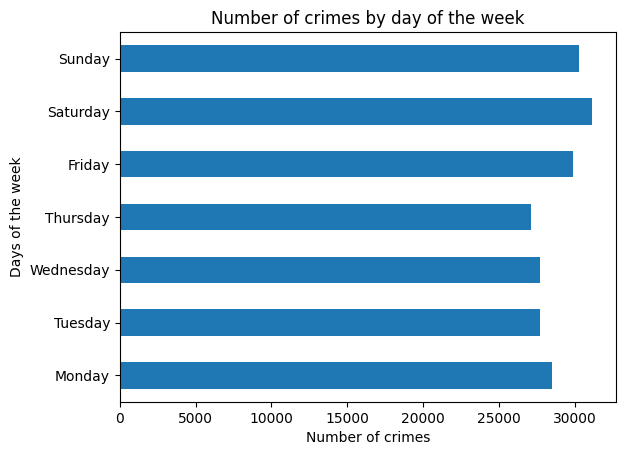

In [73]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

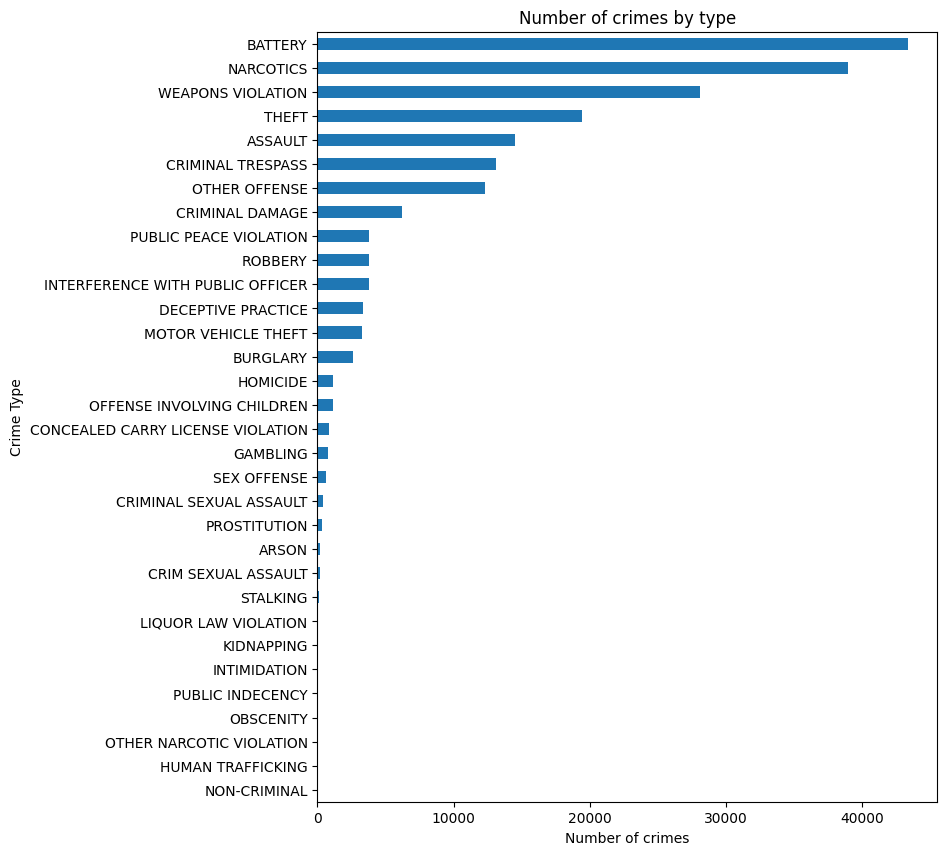

In [74]:
plt.figure(figsize=(8,10))
df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

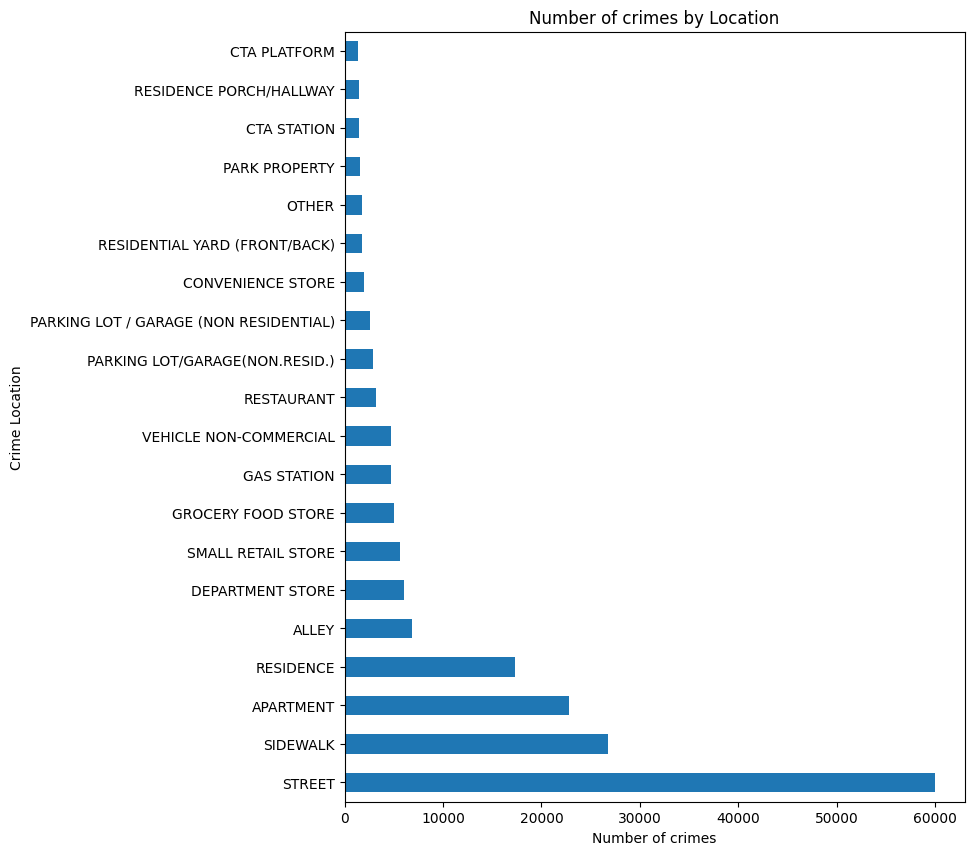

In [75]:
plt.figure(figsize=(8,10))
temp = df.groupby([df['Location Description']]).size().sort_values(ascending=False)
tempTop20 = temp.head(20)
tempTop20.plot(kind="barh")
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [76]:
df.describe()

ID  Community Area           Year       Latitude   
count  2.023960e+05   202396.000000  202396.000000  202396.000000  \
mean   1.201615e+07       37.588549    2020.020252      41.838901   
std    1.069504e+06       20.653514       1.704175       0.084660   
min    2.376500e+04        1.000000    2018.000000      36.619446   
25%    1.157557e+07       24.000000    2019.000000      41.766889   
50%    1.195984e+07       31.000000    2020.000000      41.860404   
75%    1.257083e+07       53.000000    2021.000000      41.895490   
max    1.329458e+07       77.000000    2023.000000      42.022549   

           Longitude  Population  PERCENT HOUSEHOLDS BELOW POVERTY   
count  202396.000000    202396.0                     202396.000000  \
mean      -87.672679   2679000.0                         26.663915   
std         0.060549         0.0                         10.478593   
min       -91.686566   2679000.0                          3.300000   
25%       -87.717828   2679000.0                         17.200000   
50%       -87.666723   2679000.0                         27.900000   
75%       -87.627877   2679000.0                         33.900000   
max       -87.524529   2679000.0                         56.500000   

       PERCENT AGED 16+ UNEMPLOYED   
count                202396.000000  \
mean                     17.861855   
std                       7.678561   
min                       4.700000   
25%                      10.700000   
50%                      19.600000   
75%                      23.000000   
max                      35.900000   

       PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA   
count                                 202396.000000  \
mean                                      21.319138   
std                                       11.474289   
min                                        2.500000   
25%                                       14.000000   
50%                                       20.800000   
75%                                       27.600000   
max                                       54.800000   

       PERCENT AGED UNDER 18 OR OVER 64  HARDSHIP INDEX     Birth Rate   
count                     202396.000000   202396.000000  202396.000000  \
mean                          35.580802       58.037555      16.754419   
std                            8.285707       30.188819       3.392474   
min                           13.500000        1.000000       9.400000   
25%                           32.000000       35.000000      14.300000   
50%                           38.000000       66.000000      18.000000   
75%                           41.200000       85.000000      19.500000   
max                           51.500000       98.000000      22.400000   

       Teen Birth Rate  Assault (Homicide)  Firearm-related   
count    202396.000000       202396.000000    202396.000000  \
mean         66.219452           25.792460        22.814649   
std          30.227783           16.627001        14.474118   
min           1.300000            0.000000         1.000000   
25%          41.700000            8.500000         8.600000   
50%          68.200000           29.000000        24.600000   
75%          83.100000           40.000000        37.100000   
max         116.900000           70.300000        70.300000   

       Infant Mortality Rate  Below Poverty Level  Crowded Housing   
count          202396.000000         202396.00000    202396.000000  \
mean               10.261905             24.98694         5.574962   
std                 4.264062             10.00804         3.636815   
min                 1.500000              3.10000         0.200000   
25%                 6.500000             17.10000         2.700000   
50%                10.900000             25.30000         4.800000   
75%                13.300000             32.30000         7.200000   
max                22.600000             61.40000        17.600000   

          Dependency  No High School Diploma  Per Capita In

In [77]:
df.columns

Index(['ID', 'Case Number', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Community Area', 'Year',
       'Updated On', 'Latitude', 'Longitude', 'Location', 'Population',
       'ARREST DATE', 'RACE', 'Day parts', 'COMMUNITY AREA NAME',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'HARDSHIP INDEX', 'Birth Rate',
       'Teen Birth Rate', 'Assault (Homicide)', 'Firearm-related',
       'Infant Mortality Rate', 'Below Poverty Level', 'Crowded Housing',
       'Dependency', 'No High School Diploma', 'Per Capita Income',
       'Unemployment', 'Number of Crimes'],
      dtype='object')

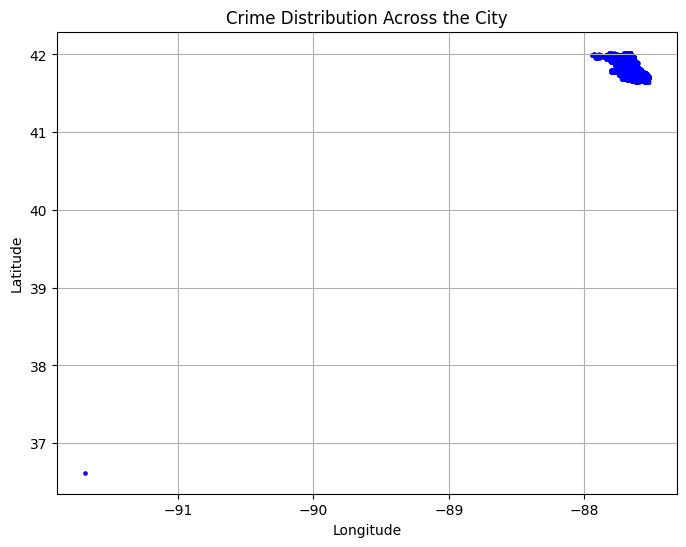

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Longitude'],
            df['Latitude'],
            alpha=0.5, s=5, color='blue')
plt.title('Crime Distribution Across the City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [79]:
# X = df['Longitude']

In [80]:
# y = df['Lattitude']

<Axes: xlabel='Longitude', ylabel='Latitude'>

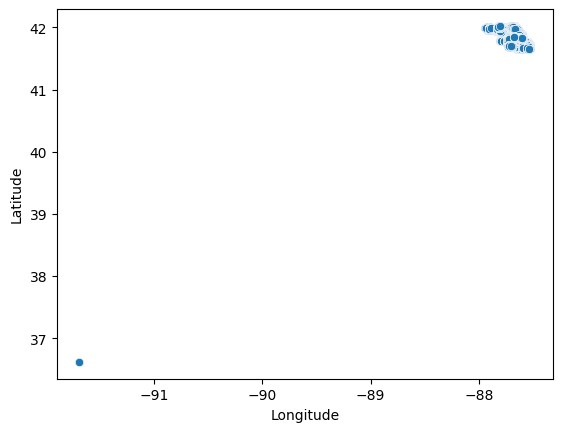

In [84]:
sns.scatterplot(x = 'Longitude', y = 'Latitude', data=df)


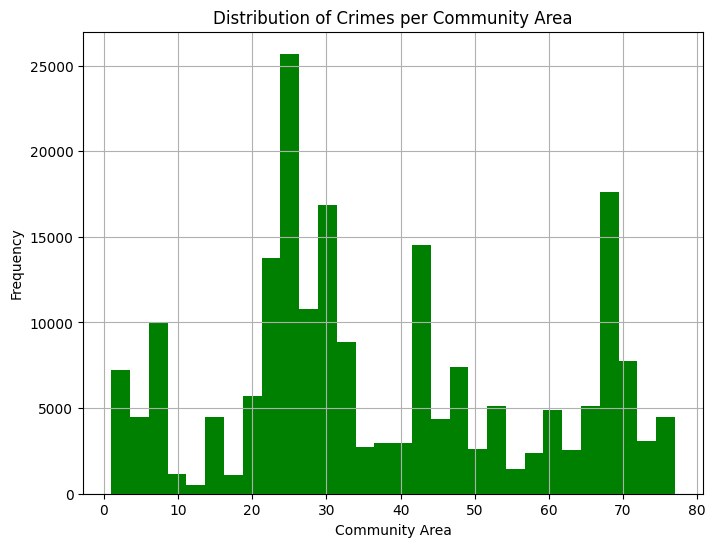

In [85]:
plt.figure(figsize=(8, 6))
plt.hist(df['Community Area'], bins=30, color='green')
plt.title('Distribution of Crimes per Community Area')
plt.xlabel('Community Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

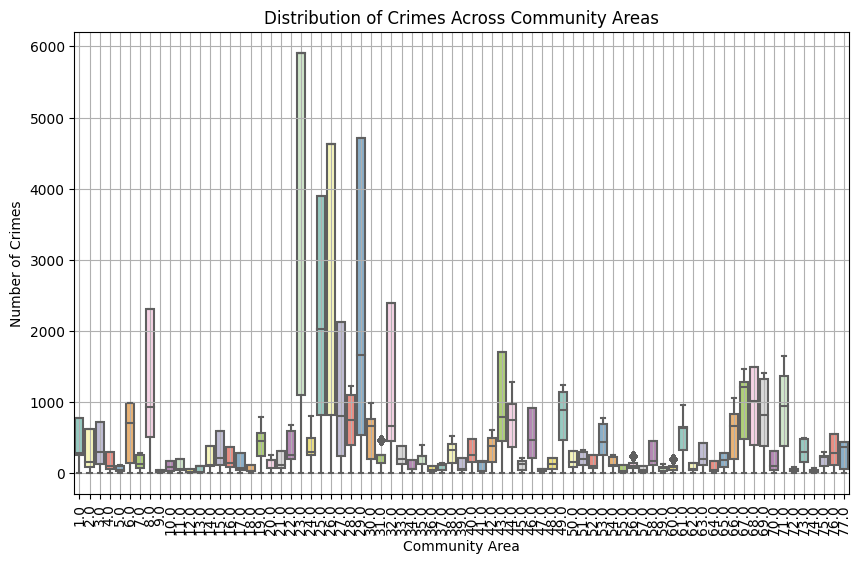

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Community Area',
            y='Number of Crimes', 
            data=df,
            palette='Set3')
plt.title('Distribution of Crimes Across Community Areas')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


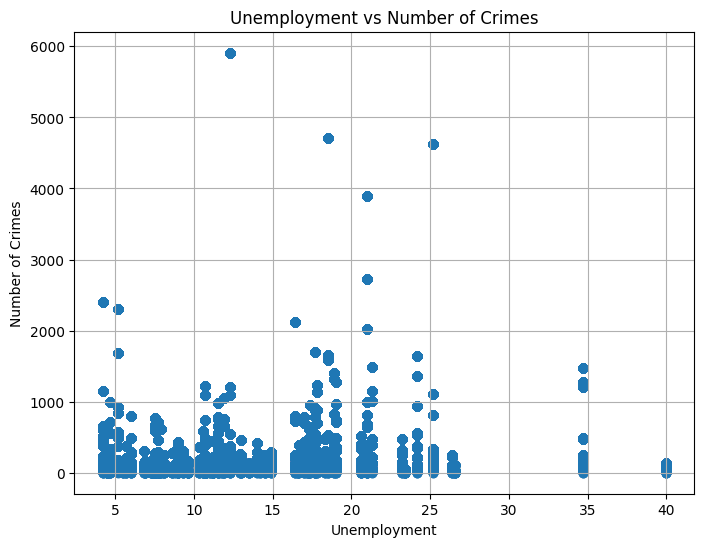

In [87]:
# Scatter plot showing 'Unemployment' vs 'Number of Crimes'
plt.figure(figsize=(8, 6))
plt.scatter(df['Unemployment'], df['Number of Crimes'], alpha=0.5)
plt.title('Unemployment vs Number of Crimes')
plt.xlabel('Unemployment')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

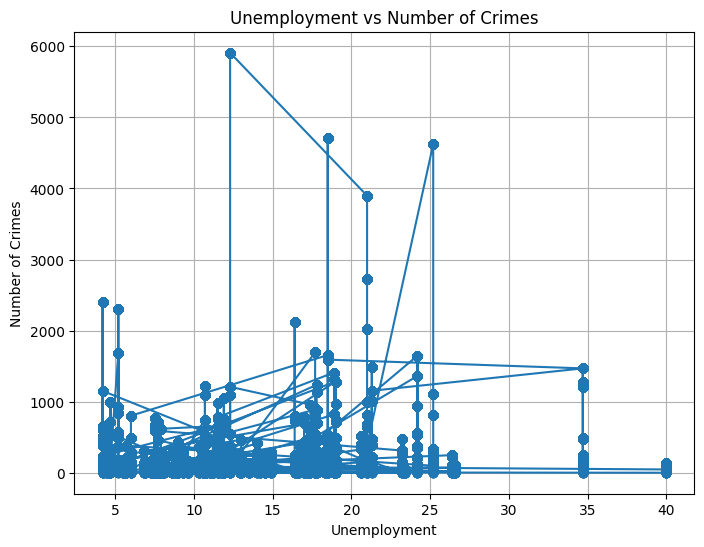

In [88]:
# Line plot of 'Unemployment vs Number of Crimes' for a clear trend)
plt.figure(figsize=(8, 6))
plt.plot(df['Unemployment'], df['Number of Crimes'], marker='o')
plt.title('Unemployment vs Number of Crimes')
plt.xlabel('Unemployment')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

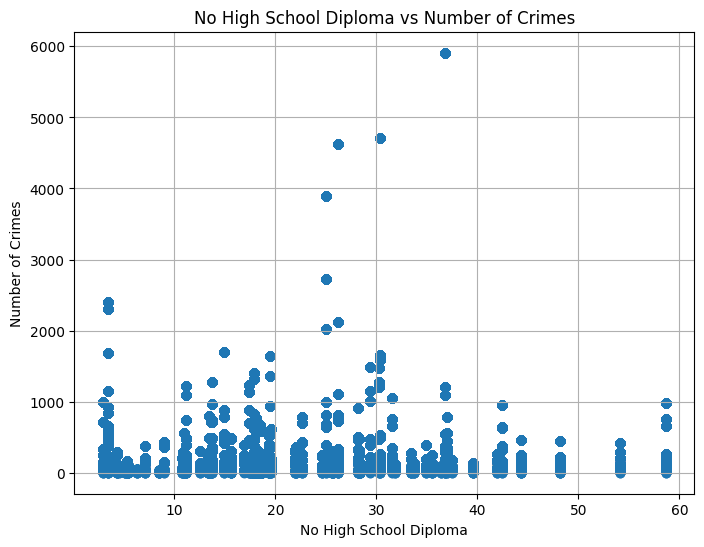

In [89]:
# Scatter plot showing 'No High School Diploma' vs 'Number of Crimes'
plt.figure(figsize=(8, 6))
plt.scatter(df['No High School Diploma'], df['Number of Crimes'], alpha=0.5)
plt.title('No High School Diploma vs Number of Crimes')
plt.xlabel('No High School Diploma')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

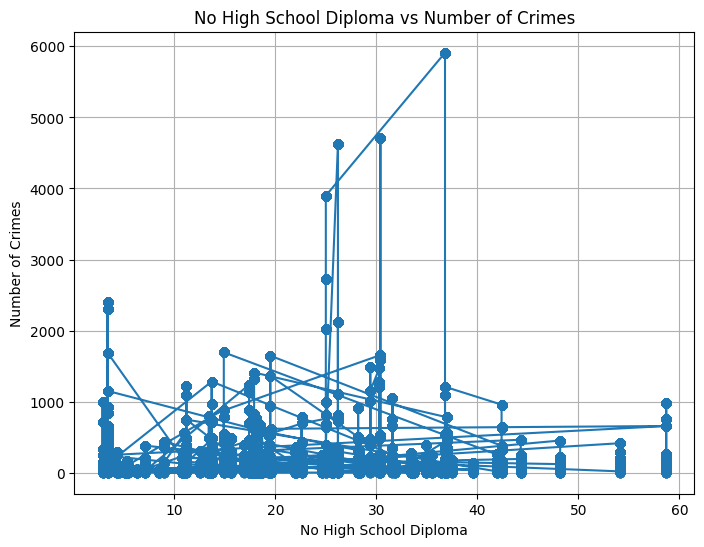

In [90]:
# Line plot of 'No High School Diploma vs Number of Crimes' for a clear trend)
plt.figure(figsize=(8, 6))
plt.plot(df['No High School Diploma'], df['Number of Crimes'], marker='o')
plt.title('No High School Diploma vs Number of Crimes')
plt.xlabel('No High School Diploma')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

In [91]:
correlation = df['Unemployment'].corr(df['Number of Crimes'])
print(f"Correlation between Unemployment and Number of Crimes: {correlation}")

Correlation between Unemployment and Number of Crimes: 0.16596566090483314


In [92]:
correlation = df['No High School Diploma'].corr(df['Number of Crimes'])
print(f"Correlation between 'No High School Diploma' and 'Number of Crimes': {correlation}")

Correlation between 'No High School Diploma' and 'Number of Crimes': 0.160364737864126


In [93]:
correlation = df['Crowded Housing'].corr(df['Number of Crimes'])
print(f"Correlation between Crowded Housing and Number of Crimes: {correlation}")

Correlation between Crowded Housing and Number of Crimes: 0.2443313674675349


In [94]:
correlation = df['Below Poverty Level'].corr(df['Number of Crimes'])
print(f"Correlation between Below Poverty Level and Number of Crimes: {correlation}")

Correlation between Below Poverty Level and Number of Crimes: 0.34507037456549644


# Descriptive Statistics

In [95]:
# Extract Community Area from df
community_areas = df['Community Area'].unique().tolist()
print(community_areas)

[46.0, 71.0, 61.0, 23.0, 25.0, 26.0, 33.0, 49.0, 68.0, 67.0, 29.0, 24.0, 53.0, 27.0, 62.0, 38.0, 66.0, 44.0, 6.0, 35.0, 1.0, 69.0, 19.0, 59.0, 48.0, 58.0, 45.0, 50.0, 40.0, 22.0, 21.0, 14.0, 52.0, 11.0, 63.0, 15.0, 32.0, 16.0, 17.0, 28.0, 20.0, 43.0, 5.0, 8.0, 76.0, 77.0, 56.0, 54.0, 41.0, 13.0, 37.0, 12.0, 73.0, 72.0, 10.0, 4.0, 7.0, 30.0, 2.0, 64.0, 47.0, 75.0, 3.0, 65.0, 39.0, 70.0, 31.0, 34.0, 42.0, 51.0, 60.0, 57.0, 18.0, 36.0, 74.0, 55.0, 9.0]


In [96]:
population = df['Population'].unique().tolist()
print(population)

[2679000.0]


In [97]:
total_crimes = df['Number of Crimes'].sum()
print(f"Total number of crimes: {total_crimes}")

Total number of crimes: 214151918


In [98]:
# Calculate crime rate per capita
crime_rate_per_capita_city = total_crimes / population
print(f"Crime rate per capita: {crime_rate_per_capita_city}")

Crime rate per capita: [79.93725943]


In [99]:
# Calculate mean for crime rates and socio-economic indicators
mean_values = df[['Number of Crimes', 'Below Poverty Level', 'Unemployment', 'No High School Diploma']].mean()

# Calculate median for crime rates and socio-economic indicators
median_values = df[['Number of Crimes', 'Below Poverty Level', 'Unemployment', 'No High School Diploma']].median()

# Calculate mode for crime rates and socio-economic indicators
mode_values = df[['Number of Crimes', 'Below Poverty Level', 'Unemployment', 'No High School Diploma']].mode().iloc[0]

print("Mean values:")
print(mean_values)

print("\nMedian values:")
print(median_values)

print("\nMode values:")
print(mode_values)


Mean values:
Number of Crimes          1058.083747
Below Poverty Level         24.986940
Unemployment                15.296366
No High School Diploma      22.682410
dtype: float64

Median values:
Number of Crimes          519.0
Below Poverty Level        25.3
Unemployment               16.7
No High School Diploma     22.0
dtype: float64

Mode values:
Number of Crimes          5910.0
Below Poverty Level         27.0
Unemployment                21.0
No High School Diploma       3.4
Name: 0, dtype: float64


In [100]:
# Calculate variance for crime rates and socio-economic indicators
variance_values = df[['Number of Crimes', 'Below Poverty Level', 'Unemployment', 'No High School Diploma']].var()

# Calculate standard deviation for crime rates and socio-economic indicators
std_deviation_values = df[['Number of Crimes', 'Below Poverty Level', 'Unemployment', 'No High School Diploma']].std()

# Calculate range for crime rates and socio-economic indicators
range_values = df[['Number of Crimes', 'Below Poverty Level', 'Unemployment', 'No High School Diploma']].max() - df[['Number of Crimes', 'Below Poverty Level', 'Unemployment', 'No High School Diploma']].min()

print("Variance values:")
print(variance_values)

print("\nStandard Deviation values:")
print(std_deviation_values)

print("\nRange values:")
print(range_values)


Variance values:
Number of Crimes          1.952272e+06
Below Poverty Level       1.001609e+02
Unemployment              5.121867e+01
No High School Diploma    1.437291e+02
dtype: float64

Standard Deviation values:
Number of Crimes          1397.237201
Below Poverty Level         10.008040
Unemployment                 7.156722
No High School Diploma      11.988708
dtype: float64

Range values:
Number of Crimes          5909.0
Below Poverty Level         58.3
Unemployment                35.8
No High School Diploma      55.8
dtype: float64


In [101]:
# For frequency distribution of crimes by region
crime_frequency_by_region = type_count['Community Area'].value_counts()

# For frequency distribution of crimes by time period
crime_frequency_by_time_period = type_count['Day parts'].value_counts()

print("Frequency distribution of crimes by region:")
print(crime_frequency_by_region)

print("\nFrequency distribution of crimes by time period:")
print(crime_frequency_by_time_period)


Frequency distribution of crimes by region:
Community Area
1.0     136
50.0    136
57.0    136
56.0    136
55.0    136
54.0    136
53.0    136
52.0    136
51.0    136
49.0    136
40.0    136
48.0    136
47.0    136
46.0    136
45.0    136
44.0    136
43.0    136
42.0    136
58.0    136
59.0    136
60.0    136
61.0    136
76.0    136
75.0    136
74.0    136
73.0    136
72.0    136
71.0    136
70.0    136
69.0    136
68.0    136
67.0    136
66.0    136
65.0    136
64.0    136
63.0    136
62.0    136
41.0    136
39.0    136
2.0     136
11.0    136
18.0    136
17.0    136
16.0    136
15.0    136
14.0    136
13.0    136
12.0    136
10.0    136
38.0    136
9.0     136
8.0     136
7.0     136
6.0     136
5.0     136
4.0     136
3.0     136
19.0    136
20.0    136
21.0    136
22.0    136
37.0    136
36.0    136
35.0    136
34.0    136
33.0    136
32.0    136
31.0    136
30.0    136
29.0    136
28.0    136
27.0    136
26.0    136
25.0    136
24.0    136
23.0    136
77.0    136
Name: count, dtyp

# Regression Analysis

In [102]:
import statsmodels.api as sm

# calculated crime rate per capita for the city
crime_rate_per_capita_city = 75.92503509 

# Create a new DataFrame with the same length as 'df' and a constant crime rate per capita value
crime_rate_per_capita_series = pd.Series([crime_rate_per_capita_city] * len(df), name='crime_rate_per_capita')

# Reset indices to align properly for concatenation
df_reset = df.reset_index(drop=True)
crime_rate_per_capita_series_reset = crime_rate_per_capita_series.reset_index(drop=True)

# Concatenate this series with your original DataFrame 'df'
df_with_crime_rate = pd.concat([df_reset, crime_rate_per_capita_series_reset], axis=1)

# Now you can use this updated DataFrame in regression analysis
X = df_with_crime_rate[['Unemployment', 'No High School Diploma']]  # Independent variables
y = df_with_crime_rate['crime_rate_per_capita']  # Dependent variable

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     crime_rate_per_capita   R-squared:                    -123.869
Model:                               OLS   Adj. R-squared:               -123.870
Method:                    Least Squares   F-statistic:                -1.004e+05
Date:                   Sun, 07 Jan 2024   Prob (F-statistic):               1.00
Time:                           13:06:24   Log-Likelihood:             5.4553e+06
No. Observations:                 202396   AIC:                        -1.091e+07
Df Residuals:                     202393   BIC:                        -1.091e+07
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [103]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and its p-value
correlation_coefficient, p_value = pearsonr(df['Number of Crimes'], df['Unemployment'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Compare p-value with significance level (of 0.0)
significance_level = 0.05
if p_value < significance_level:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson correlation coefficient: 0.16596566090484713
P-value: 0.0
The correlation is statistically significant.
